### Name:
### PID:

# Exercise 1
## Excercise 1, a)

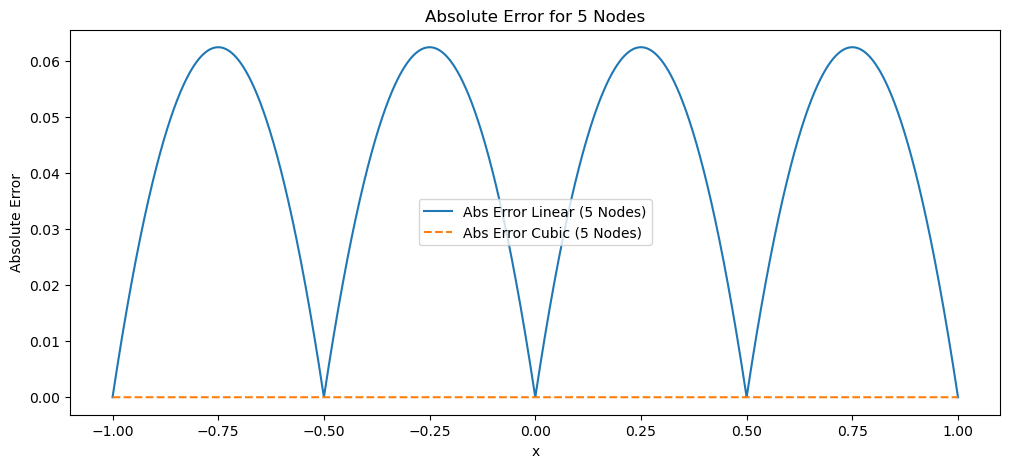

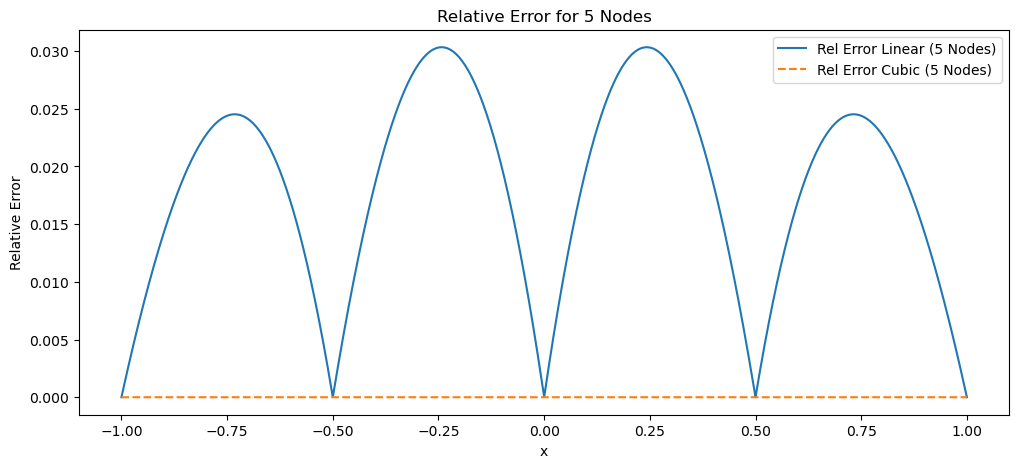

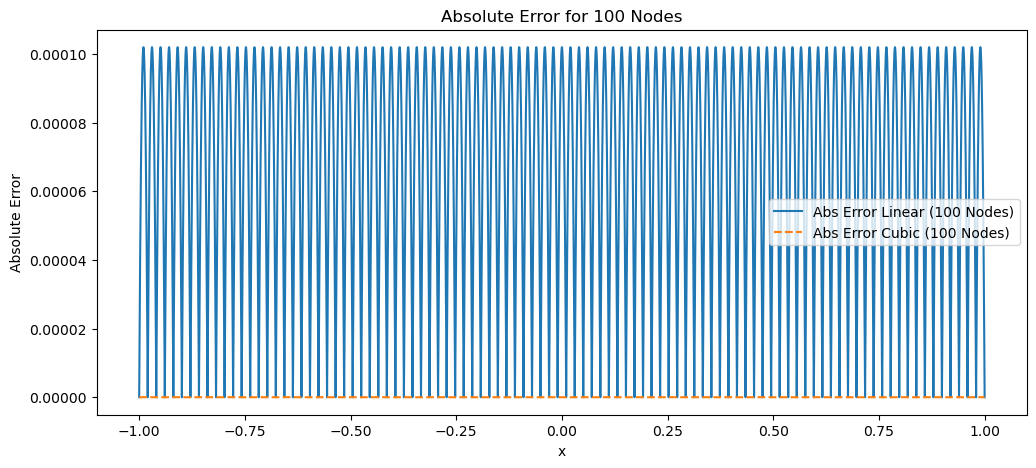

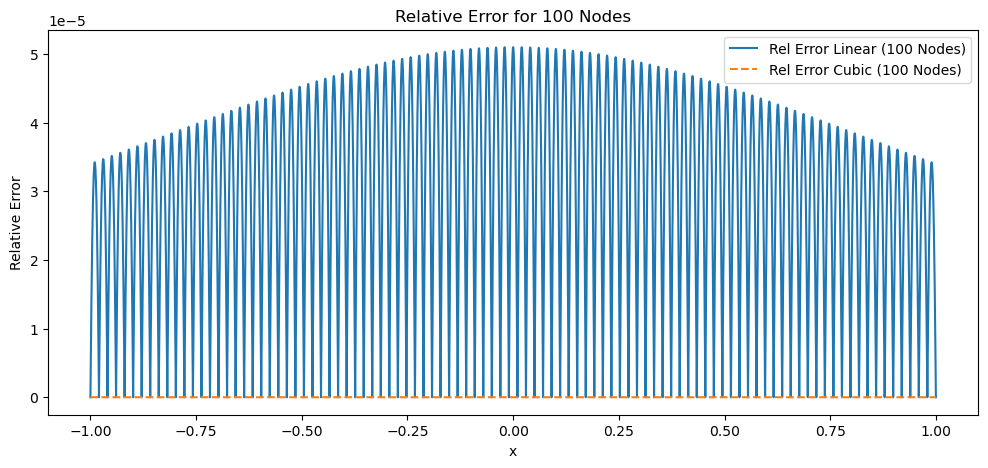

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline

# Define function f(x) = 2 + x^2
def f(x):
    return 2 + x**2

# Define x ranges
x_fine = np.linspace(-1, 1, 10000)  # Fine grid for error analysis

# Define interpolation nodes
x5 = np.linspace(-1, 1, 5)  # 5 points
x100 = np.linspace(-1, 1, 100)  # 100 points

y5 = f(x5)
y100 = f(x100)

def interpolate_and_plot(x_nodes, y_nodes, label_suffix):
    """Interpolates using linear and cubic methods, then computes and plots errors."""
    
    # Linear interpolation
    linear_interp = interp1d(x_nodes, y_nodes, kind='linear', fill_value='extrapolate')
    y_linear = linear_interp(x_fine)
    
    # Cubic spline interpolation
    cubic_interp = CubicSpline(x_nodes, y_nodes)
    y_cubic = cubic_interp(x_fine)
    
    # Compute errors
    true_values = f(x_fine)
    abs_error_linear = np.abs(y_linear - true_values)
    abs_error_cubic = np.abs(y_cubic - true_values)
    rel_error_linear = abs_error_linear / np.abs(true_values)
    rel_error_cubic = abs_error_cubic / np.abs(true_values)
    
    # Plot errors
    plt.figure(figsize=(12, 5))
    plt.plot(x_fine, abs_error_linear, label=f'Abs Error Linear ({label_suffix})')
    plt.plot(x_fine, abs_error_cubic, label=f'Abs Error Cubic ({label_suffix})', linestyle='dashed')
    plt.xlabel('x')
    plt.ylabel('Absolute Error')
    plt.legend()
    plt.title(f'Absolute Error for {label_suffix}')
    plt.show()
    
    plt.figure(figsize=(12, 5))
    plt.plot(x_fine, rel_error_linear, label=f'Rel Error Linear ({label_suffix})')
    plt.plot(x_fine, rel_error_cubic, label=f'Rel Error Cubic ({label_suffix})', linestyle='dashed')
    plt.xlabel('x')
    plt.ylabel('Relative Error')
    plt.legend()
    plt.title(f'Relative Error for {label_suffix}')
    plt.show()

# Perform interpolation and plotting
interpolate_and_plot(x5, y5, '5 Nodes')
interpolate_and_plot(x100, y100, '100 Nodes')


## Excercise 1, b)

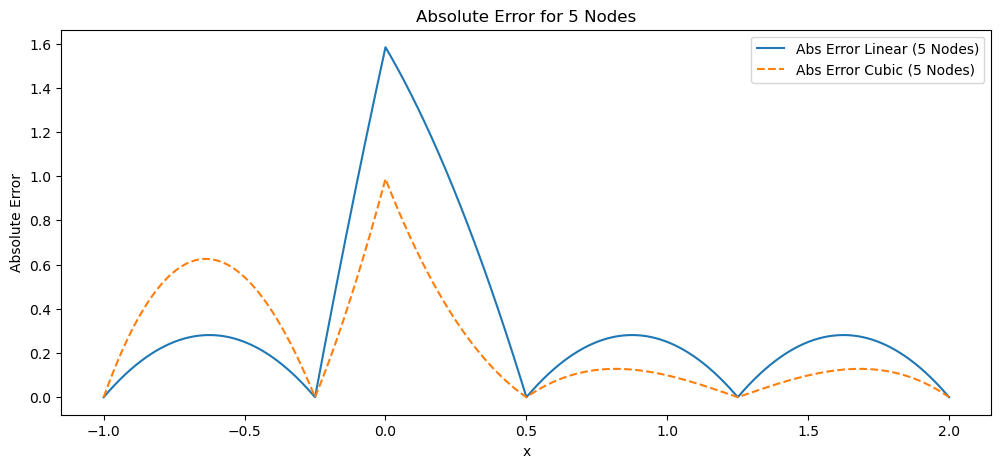

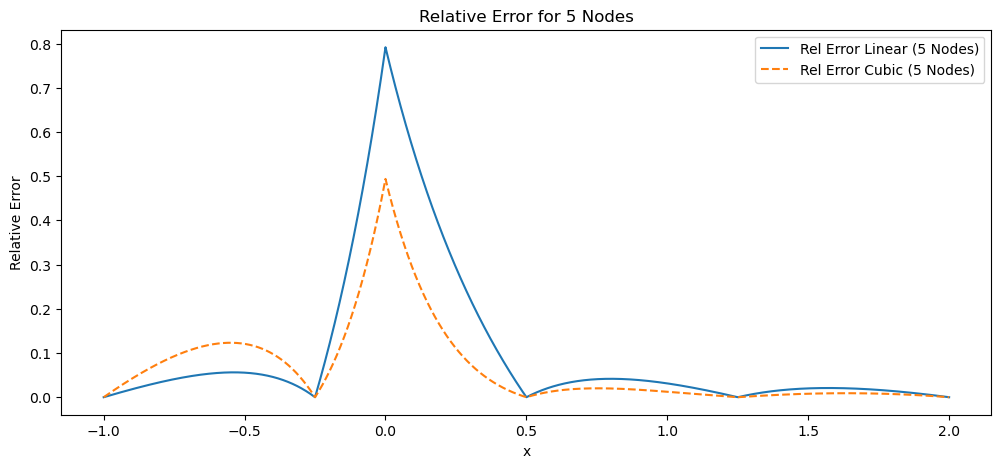

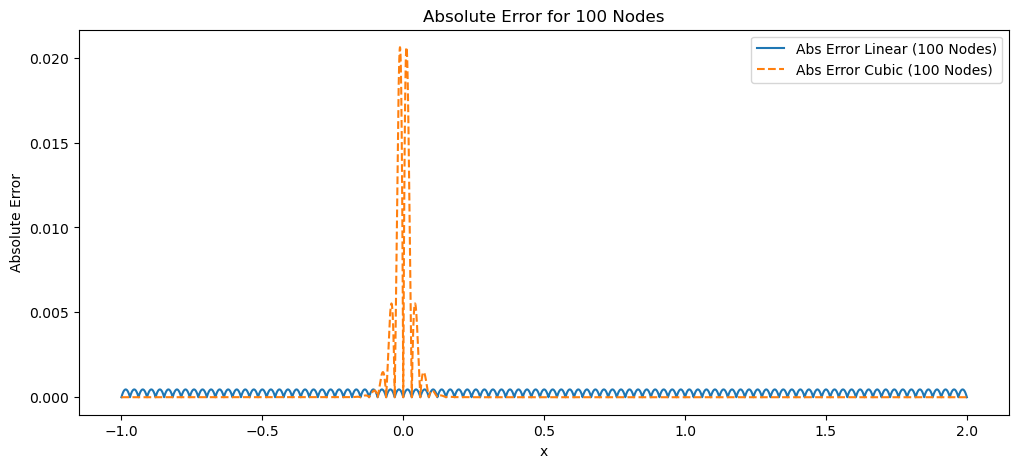

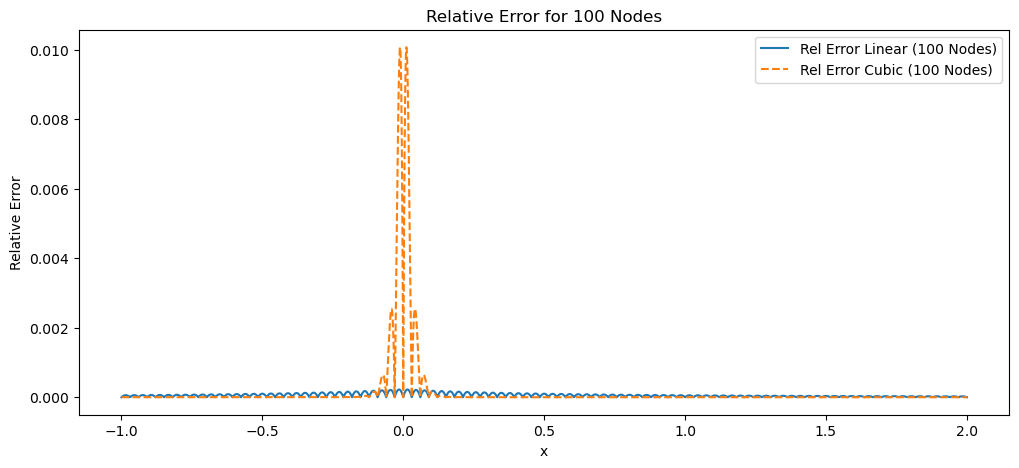

In [9]:
# Define function f(x) for Exercise 1b
def f(x):
    return 2 + 2*x**2 + np.abs(4*x)

# Define x range
x_fine = np.linspace(-1, 2, 10000)  # Fine grid for error analysis

# Define interpolation nodes
x5 = np.linspace(-1, 2, 5)  # 5 points
x100 = np.linspace(-1, 2, 100)  # 100 points

y5 = f(x5)
y100 = f(x100)

def interpolate_and_plot(x_nodes, y_nodes, label_suffix):
    """Interpolates using linear and cubic methods, then computes and plots errors."""
    
    # Linear interpolation
    linear_interp = interp1d(x_nodes, y_nodes, kind='linear', fill_value='extrapolate')
    y_linear = linear_interp(x_fine)
    
    # Cubic spline interpolation
    cubic_interp = CubicSpline(x_nodes, y_nodes)
    y_cubic = cubic_interp(x_fine)
    
    # Compute errors
    true_values = f(x_fine)
    abs_error_linear = np.abs(y_linear - true_values)
    abs_error_cubic = np.abs(y_cubic - true_values)
    rel_error_linear = abs_error_linear / np.abs(true_values)
    rel_error_cubic = abs_error_cubic / np.abs(true_values)
    
    # Plot errors
    plt.figure(figsize=(12, 5))
    plt.plot(x_fine, abs_error_linear, label=f'Abs Error Linear ({label_suffix})')
    plt.plot(x_fine, abs_error_cubic, label=f'Abs Error Cubic ({label_suffix})', linestyle='dashed')
    plt.xlabel('x')
    plt.ylabel('Absolute Error')
    plt.legend()
    plt.title(f'Absolute Error for {label_suffix}')
    plt.show()
    
    plt.figure(figsize=(12, 5))
    plt.plot(x_fine, rel_error_linear, label=f'Rel Error Linear ({label_suffix})')
    plt.plot(x_fine, rel_error_cubic, label=f'Rel Error Cubic ({label_suffix})', linestyle='dashed')
    plt.xlabel('x')
    plt.ylabel('Relative Error')
    plt.legend()
    plt.title(f'Relative Error for {label_suffix}')
    plt.show()

# Perform interpolation and plotting
interpolate_and_plot(x5, y5, '5 Nodes')
interpolate_and_plot(x100, y100, '100 Nodes')


# Exercise 2
## Excercise 2, a)


In [10]:
import numpy as np

# Given parameter values
beta = 0.92      # Patience factor
alpha = 0.33     # Capital share in production
delta = 0.10     # Depreciation rate
gamma = 2        # Relative risk aversion
phi = 0.05       # Capital adjustment cost

# Compute steady state capital using the given formula
K_ss = ((1/beta + delta - 1) / alpha) ** (1 / (alpha - 1))

print(f"Steady State Capital (K_ss): {K_ss:.4f}")


Steady State Capital (K_ss): 2.3352


## Exercise 2, b)

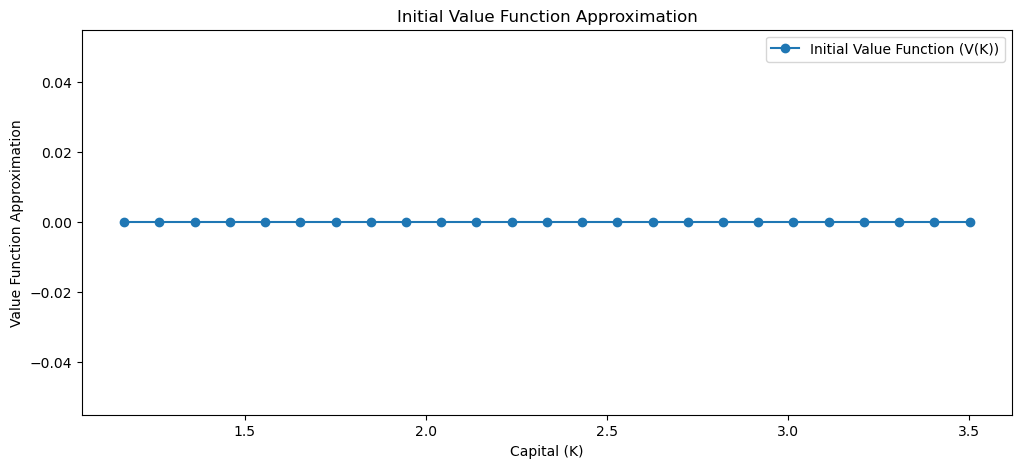

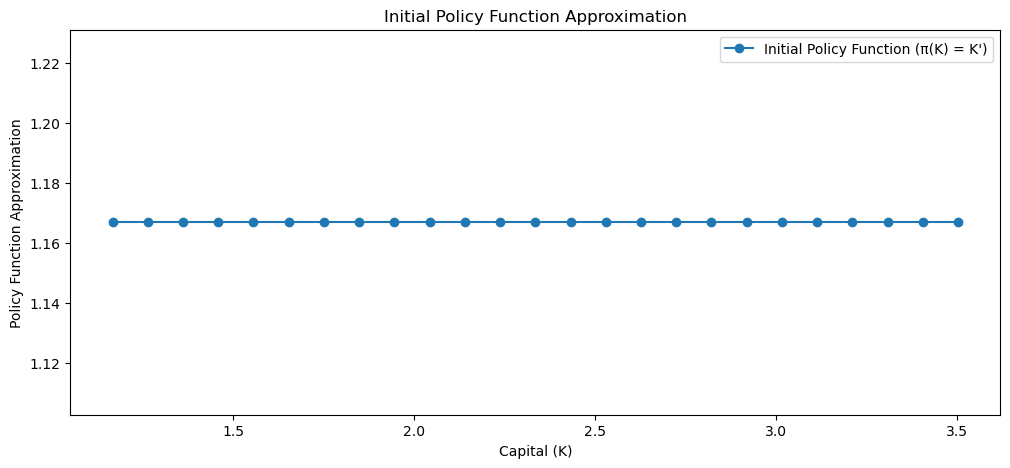

In [11]:

# Define parameters
K_min, K_max = 1.167, 3.502  # Given capital range
num_nodes = 25  # Number of interpolation nodes

# Create the grid for K
Kgrid = np.linspace(K_min, K_max, num_nodes)

# Initialize the value function approximation (start with zero)
V_approx = np.zeros_like(Kgrid)

# Initialize the policy function (always predict K' = 1.167 initially)
policy_approx = np.full_like(Kgrid, K_min)

# Create cubic spline interpolators
V_spline = CubicSpline(Kgrid, V_approx)  # Initial cubic spline for value function
policy_spline = CubicSpline(Kgrid, policy_approx)  # Initial cubic spline for policy function

# Plot the initial approximations
plt.figure(figsize=(12, 5))
plt.plot(Kgrid, V_approx, 'o-', label="Initial Value Function (V(K))")
plt.xlabel("Capital (K)")
plt.ylabel("Value Function Approximation")
plt.legend()
plt.title("Initial Value Function Approximation")
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(Kgrid, policy_approx, 'o-', label="Initial Policy Function (π(K) = K')")
plt.xlabel("Capital (K)")
plt.ylabel("Policy Function Approximation")
plt.legend()
plt.title("Initial Policy Function Approximation")
plt.show()


## Exercise 2 c)

In [12]:
from scipy.optimize import minimize

def utility(C, gamma):
    """CRRA utility function."""
    if C <= 0:
        return -np.inf
    if gamma == 1:
        return np.log(C)
    return (C**(1 - gamma)) / (1 - gamma)

def get_update(K, V_approx_old, alpha, beta, delta, gamma, phi, Kgrid):
    """
    Perform a Bellman update for a single value of capital K.
    
    Parameters:
        K : float
            Current capital level.
        V_approx_old : CubicSpline
            Previous approximation of the value function.
        alpha, beta, delta, gamma, phi : floats
            Model parameters.
        Kgrid : np.array
            Grid of capital values used for interpolation.
    
    Returns:
        Tuple (V_new_K, K_prime_star)
            Updated value at K and optimal choice of K'
    """
    
    # Objective function: negative Bellman RHS (since we minimize)
    def objective(K_prime):
        C = K**alpha + (1 - delta) * K - K_prime - phi * (K_prime - K)**2
        u = utility(C, gamma)
        if u == -np.inf:
            return 1e10  # Penalize invalid choices
        V_future = V_approx_old(K_prime)
        return -(u + beta * V_future)

    # Bounds and initial guess
    bounds = [(Kgrid[0], Kgrid[-1])]
    initial_guess = max((1 - delta) * K, Kgrid[0])

    # Optimization
    result = minimize(objective, x0=initial_guess, bounds=bounds, method='Nelder-Mead')

    # Extract results
    K_prime_star = result.x[0]
    V_new_K = -result.fun

    return V_new_K, K_prime_star


## Exercise 2, d)

In [18]:
def update_V(Kgrid, V_approx_old, alpha, beta, delta, gamma, phi):
    """
    Perform a full Bellman update over all capital levels in Kgrid.
    
    Returns:
        V_new_spline : CubicSpline for updated value function
        policy_spline : CubicSpline for updated policy function
    """
    V_new_vals = np.empty_like(Kgrid)
    policy_vals = np.empty_like(Kgrid)
    
    for i, K in enumerate(Kgrid):
        V_new_vals[i], policy_vals[i] = get_update(K, V_approx_old, alpha, beta, delta, gamma, phi, Kgrid)
    
    # Create updated spline interpolators
    V_new_spline = CubicSpline(Kgrid, V_new_vals)
    policy_spline = CubicSpline(Kgrid, policy_vals)

    return V_new_spline, policy_spline


## Exercise 2, e)

In [19]:
def converge_Bellman(Kgrid, alpha, beta, delta, gamma, phi, maxiter=1000, tol=1e-9):
    """
    Iteratively update the value and policy functions until convergence.
    
    Returns:
        V_final : CubicSpline (value function)
        policy_final : CubicSpline (policy function)
        converged : bool
    """
    # Initialize value function: V(K) = 0
    V_approx_old = CubicSpline(Kgrid, np.zeros_like(Kgrid))

    for iteration in range(maxiter):
        # Bellman update
        V_new_spline, policy_spline = update_V(Kgrid, V_approx_old, alpha, beta, delta, gamma, phi)

        # Evaluate old and new V at grid points
        V_old_vals = V_approx_old(Kgrid)
        V_new_vals = V_new_spline(Kgrid)

        # Check for convergence
        diff = np.max(np.abs(V_new_vals - V_old_vals))
        if diff < tol:
            return V_new_spline, policy_spline, True

        # Update for next iteration
        V_approx_old = V_new_spline

    # If not converged
    return V_new_spline, policy_spline, False


## Exercise 2, f)

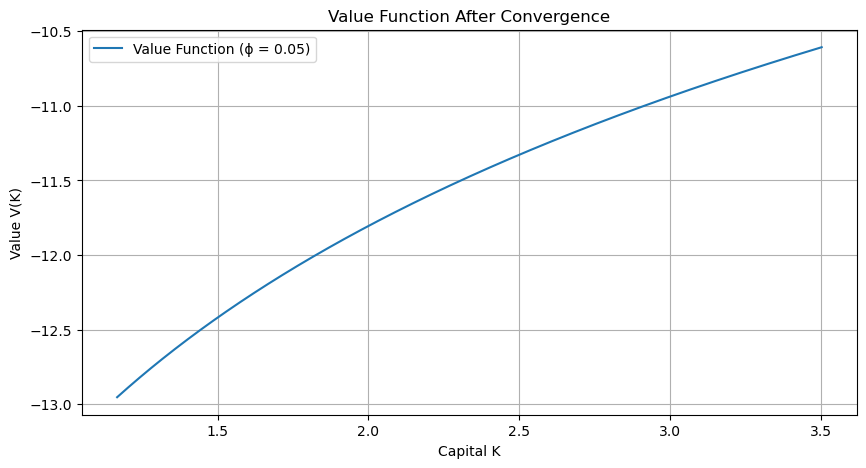

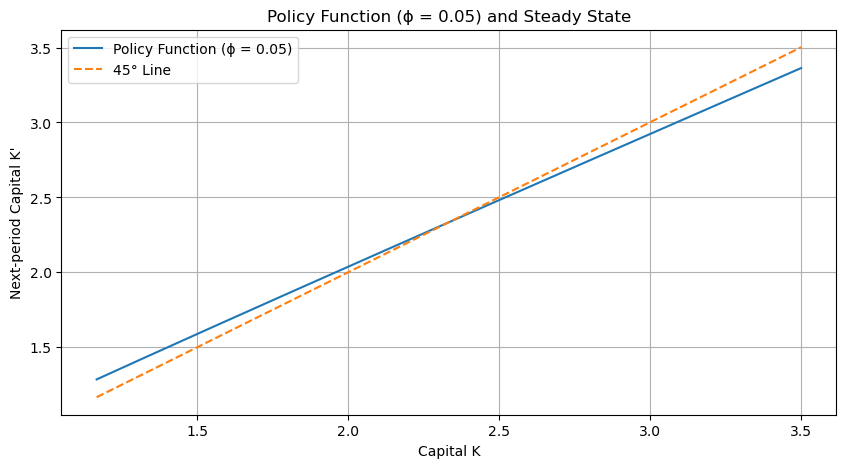

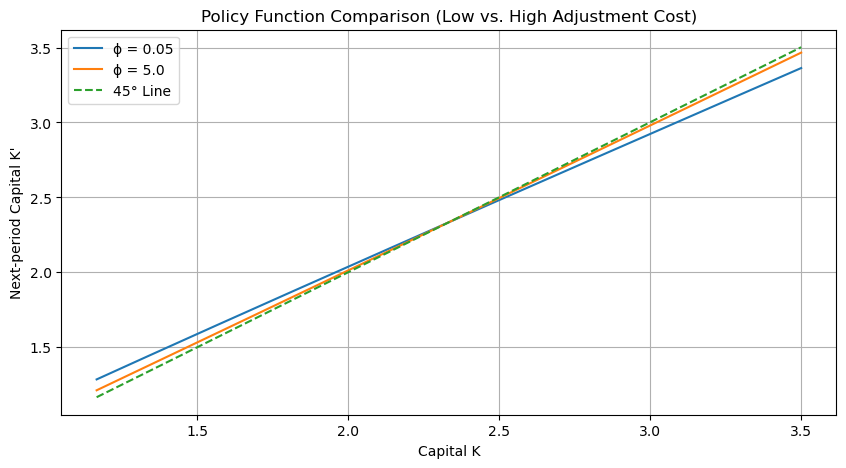

In [20]:
import matplotlib.pyplot as plt

# Set parameters
alpha = 0.33
beta = 0.92
delta = 0.10
gamma = 2
Kgrid = np.linspace(1.167, 3.502, 25)

# Run for phi = 0.05
phi_low = 0.05
V_low, policy_low, conv_low = converge_Bellman(Kgrid, alpha, beta, delta, gamma, phi_low)

# Run for phi = 5.0
phi_high = 5.0
V_high, policy_high, conv_high = converge_Bellman(Kgrid, alpha, beta, delta, gamma, phi_high)

# Evaluate splines for plotting
K_dense = np.linspace(Kgrid[0], Kgrid[-1], 500)
V_vals_low = V_low(K_dense)
policy_vals_low = policy_low(K_dense)
V_vals_high = V_high(K_dense)
policy_vals_high = policy_high(K_dense)

# Plot Value Function (low phi)
plt.figure(figsize=(10, 5))
plt.plot(K_dense, V_vals_low, label="Value Function (ϕ = 0.05)")
plt.xlabel("Capital K")
plt.ylabel("Value V(K)")
plt.title("Value Function After Convergence")
plt.legend()
plt.grid(True)
plt.show()

# Plot Policy Function (ϕ = 0.05) + 45° line
plt.figure(figsize=(10, 5))
plt.plot(K_dense, policy_vals_low, label="Policy Function (ϕ = 0.05)")
plt.plot(K_dense, K_dense, '--', label="45° Line")
plt.xlabel("Capital K")
plt.ylabel("Next-period Capital K'")
plt.title("Policy Function (ϕ = 0.05) and Steady State")
plt.legend()
plt.grid(True)
plt.show()

# Plot comparison of policy functions for ϕ = 0.05 vs 5.0
plt.figure(figsize=(10, 5))
plt.plot(K_dense, policy_vals_low, label="ϕ = 0.05")
plt.plot(K_dense, policy_vals_high, label="ϕ = 5.0")
plt.plot(K_dense, K_dense, '--', label="45° Line")
plt.xlabel("Capital K")
plt.ylabel("Next-period Capital K'")
plt.title("Policy Function Comparison (Low vs. High Adjustment Cost)")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# computations here

In [15]:
# computations here

In [16]:
# computations here

Writing here:



